## 1.  Google Play Store apps and reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

**Data Files**

- apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
- user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [26]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')
# print(apps_with_duplicates.shape[0])

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

# Have a look at a random sample of 5 rows
print(apps.head())

Total number of apps in the dataset =  9659
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1 

## 2. Data cleaning
<p>Data cleaning is one of the most essential subtask any data science project. Although it can be a very tedious process, it's worth should never be undermined.</p>
<p>By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like <code>Installs</code> and <code>Price</code> have a few special characters (<code>+</code> <code>,</code> <code>$</code>) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].</p>
<p>Hence, we now proceed to clean our data. Specifically, the special characters <code>,</code> and <code>+</code> present in <code>Installs</code> column and <code>$</code> present in <code>Price</code> column need to be removed.</p>
<p>It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the <code>info()</code> method to acheive this.</p>

In [27]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']

# List of column names to clean
cols_to_clean = ["Installs", "Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))


# Print a summary of the apps dataframe
print(apps.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. Correcting data types
<p>From the previous task we noticed that <code>Installs</code> and <code>Price</code> were categorized as <code>object</code> data type (and not <code>int</code> or <code>float</code>) as we would like. This is because these two columns originally had mixed input types: digits and special characters. To know more about Pandas data types, read <a href="https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/">this</a>.</p>
<p>The four features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code>. While <code>Size</code> and <code>Rating</code> are both <code>float</code> (i.e. purely numerical data types), we still need to work on <code>Installs</code> and <code>Price</code> to make them numeric.</p>

In [28]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(np.float64)

# Convert Price to float data type
apps['Price'] = apps['Price'].astype(np.float64)

# Checking dtypes of the apps dataframe
print(apps.dtypes)
# print(apps.info())

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


## 4. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

In [29]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

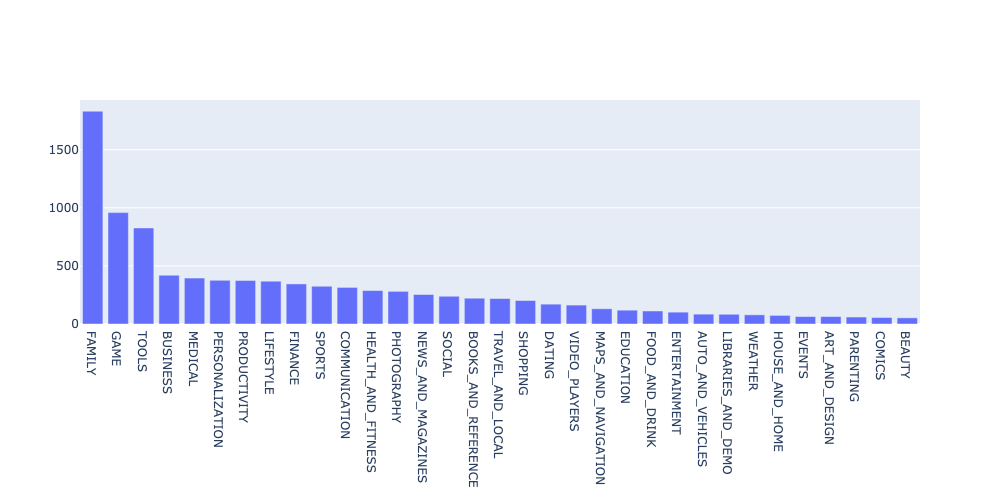

In [30]:
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = apps['Category'].unique().size
# print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()
# print(num_apps_in_category)

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)
# print(sorted_num_apps_in_category)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

fig = go.Figure(data)
fig.show(renderer='png', width=1000, height=500)